# MNIST Digits - Classification Using SVM

In this notebook, we'll explore the popular MNIST dataset and build an SVM model to classify handwritten digits. <a href='http://yann.lecun.com/exdb/mnist/'>Here is a detailed description of the dataset.</a>

We'll divide the analysis into the following parts:
- Data understanding and cleaning
- Data preparation for model building
- Building an SVM model - hyperparameter tuning, model evaluation etc.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
digit = pd.read_csv('train.csv')

In [3]:
digit.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Each digit is represented as pixel(28*28=784) so we have 784 columns starting from 0 to 783. 

In [4]:
digit['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [5]:
# let check any no ex 5, 4

In [6]:
five = digit.iloc[8:9,1:]

In [7]:
five

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
four = digit.iloc[3, 1:]
four.shape

(784,)

In [9]:
five = five.values.reshape(28,28)
four = four.values.reshape(28,28)

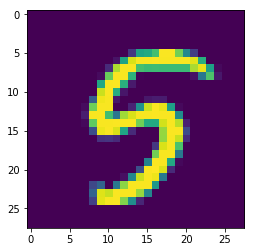

In [10]:
plt.imshow(five)

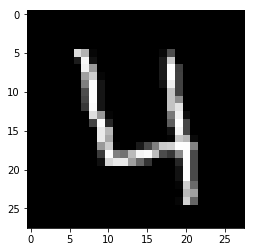

In [11]:
plt.imshow(four, cmap='gray')

In [12]:
# visualise the array
print(five[4:-4, 7:-4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  41 149 156 179 254 254 201 119  46   0   0]
 [  0   0   0   0  13 147 241 253 253 254 253 253 253 253 245 160   0]
 [  0   0   0  31 224 253 253 180 174 175 174 174 174 174 223 247 145]
 [  0   0   7 197 254 253 165   2   0   0   0   0   0   0  12 102 184]
 [  0   0 152 253 254 162  18   0   0   0   0   0   0   0   0   0   0]
 [  0   0 235 254 158  15   0   0   0   0   0   0   0   0   0   0   0]
 [  0  74 250 253  15   0   0   0  16  20  19   0   0   0   0   0   0]
 [  7 199 253 253   0   0  25 130 235 254 247 145   6   0   0   0   0]
 [ 20 253 253 177 100 219 240 253 253 254 253 253 125   0   0   0   0]
 [  5 193 253 253 254 253 253 200 155 155 238 253 229  23   0   0   0]
 [  0  61 249 254 241 150  30   0   0   0 215 254 254  58   0   0   0]
 [  0   0  36  39  30   0   0   0   0   0 214 253 234  31   0   0   0]
 [  0   0   0   0   0   0   0   0   0  41 241 253 183   0   0   0   0]
 [  0 

In [13]:
print(four[5:-5, 5:-5])

[[  0 220 179   6   0   0   0   0   0   0   0   0   9  77   0   0   0   0]
 [  0  28 247  17   0   0   0   0   0   0   0   0  27 202   0   0   0   0]
 [  0   0 242 155   0   0   0   0   0   0   0   0  27 254  63   0   0   0]
 [  0   0 160 207   6   0   0   0   0   0   0   0  27 254  65   0   0   0]
 [  0   0 127 254  21   0   0   0   0   0   0   0  20 239  65   0   0   0]
 [  0   0  77 254  21   0   0   0   0   0   0   0   0 195  65   0   0   0]
 [  0   0  70 254  21   0   0   0   0   0   0   0   0 195 142   0   0   0]
 [  0   0  56 251  21   0   0   0   0   0   0   0   0 195 227   0   0   0]
 [  0   0   0 222 153   5   0   0   0   0   0   0   0 120 240  13   0   0]
 [  0   0   0  67 251  40   0   0   0   0   0   0   0  94 255  69   0   0]
 [  0   0   0   0 234 184   0   0   0   0   0   0   0  19 245  69   0   0]
 [  0   0   0   0 234 169   0   0   0   0   0   0   0   3 199 182  10   0]
 [  0   0   0   0 154 205   4   0   0  26  72 128 203 208 254 254 131   0]
 [  0   0   0   0  61 254

In [14]:
# Summarise the counts of 'label' to see how many labels of each digit are present
digit['label'].astype('category').value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [15]:
# let check persentage of each label in dataset
round(digit['label'].astype('category').value_counts()*100/len(digit['label']),5)

1    11.15238
7    10.47857
3    10.35952
9     9.97143
2     9.94524
6     9.85000
0     9.83810
4     9.69524
8     9.67381
5     9.03571
Name: label, dtype: float64

As we can see it is balanced dataset

In [16]:
# missing values - there are none
digit.isnull().sum()

label       0
pixel0      0
pixel1      0
pixel2      0
pixel3      0
pixel4      0
pixel5      0
pixel6      0
pixel7      0
pixel8      0
pixel9      0
pixel10     0
pixel11     0
pixel12     0
pixel13     0
pixel14     0
pixel15     0
pixel16     0
pixel17     0
pixel18     0
pixel19     0
pixel20     0
pixel21     0
pixel22     0
pixel23     0
pixel24     0
pixel25     0
pixel26     0
pixel27     0
pixel28     0
           ..
pixel754    0
pixel755    0
pixel756    0
pixel757    0
pixel758    0
pixel759    0
pixel760    0
pixel761    0
pixel762    0
pixel763    0
pixel764    0
pixel765    0
pixel766    0
pixel767    0
pixel768    0
pixel769    0
pixel770    0
pixel771    0
pixel772    0
pixel773    0
pixel774    0
pixel775    0
pixel776    0
pixel777    0
pixel778    0
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Length: 785, dtype: int64

Also, let's look at the average values of each column, since we'll need to do some rescaling in case the ranges vary too much.

In [17]:
digit.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


You can see that the max value of the mean and maximum values of some features (pixels) is 255 etc., whereas most features lie in much lower ranges  (look at description of pixel 0, pixel 1 etc. above).

Thus, it seems like a good idea to rescale the features.

# Data Preparation for Model Building

Let's now prepare the dataset for building the model. We'll only use a fraction of the data else training will take a long time.


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import scale

In [19]:
X = digit.drop(['label'], axis=1)

In [21]:
y = digit['label']

In [24]:
X = scale(X)

c:\users\neeraj bafila\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.10, random_state=101)
# as i am using 4 gb ram so i chose only 10% data for training

c:\users\neeraj bafila\appdata\local\programs\python\python36\lib\site-packages\sklearn\model_selection\_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [29]:
# delete test set from memory, to avoid a memory error
# we'll anyway use CV to evaluate the model, and can use the separate test.csv file as well
# to evaluate the model finally

# del X_test
# del y_test

# Model Building

Let's now build the model and tune the hyperparameters. Let's start with a **linear model** first.

### Linear SVM

Let's first try building a linear SVM model (i.e. a linear kernel). 

In [35]:
from sklearn.svm import SVC

In [39]:
linear_model = SVC(kernel='linear')

In [40]:
linear_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [42]:
y_pridict = linear_model.predict(X_test)

In [43]:
from sklearn import metrics

In [44]:
print('Accuracy for linear model is{0}: '.format(metrics.accuracy_score(y_test, y_pridict)))

Accuracy for linear model is0.9042592592592592: 


In [47]:
y_pridict[:100]

array([1, 3, 0, 0, 1, 9, 1, 5, 0, 6, 7, 9, 5, 6, 6, 7, 1, 5, 1, 5, 0, 4,
       3, 0, 1, 2, 8, 1, 6, 9, 9, 1, 5, 6, 1, 0, 8, 5, 1, 6, 7, 3, 2, 9,
       2, 5, 6, 8, 1, 4, 4, 0, 5, 1, 9, 6, 0, 1, 2, 3, 5, 9, 2, 5, 9, 5,
       0, 6, 8, 5, 4, 2, 7, 4, 5, 9, 4, 1, 3, 3, 3, 6, 4, 3, 4, 2, 7, 0,
       5, 2, 1, 0, 9, 7, 0, 8, 3, 0, 2, 9], dtype=int64)

In [50]:
print('Classification report \n {0}: '.format(metrics.classification_report(y_test, y_pridict)))

Classification report 
               precision    recall  f1-score   support

           0       0.94      0.97      0.95      3715
           1       0.94      0.98      0.96      4185
           2       0.89      0.89      0.89      3790
           3       0.88      0.87      0.87      3900
           4       0.88      0.92      0.90      3702
           5       0.87      0.85      0.86      3418
           6       0.94      0.94      0.94      3693
           7       0.90      0.92      0.91      3954
           8       0.91      0.84      0.88      3665
           9       0.88      0.85      0.87      3778

   micro avg       0.90      0.90      0.90     37800
   macro avg       0.90      0.90      0.90     37800
weighted avg       0.90      0.90      0.90     37800
: 


In [53]:
# run gc.collect() (garbage collect) to free up memory
# else, since the dataset is large and SVM is computationally heavy,
# it'll throw a memory error while training
# import gc
# gc.collect()

5967

# Non-Linear SVM

Let's now try a non-linear model with the RBF kernel.

In [54]:
nonlinear_model = SVC(kernel='rbf')

In [55]:
#keeping other hyper param default
nonlinear_model.fit(X_train, y_train)

c:\users\neeraj bafila\appdata\local\programs\python\python36\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [56]:
y_pridict = nonlinear_model.predict(X_test)

In [57]:
print('Accuracy for nonlinear model is {0} '.format(metrics.accuracy_score(y_test, y_pridict)))

Accuracy for nonlinear model is 0.9255820105820106 


In [58]:
print('clasification report \n', metrics.classification_report(y_test, y_pridict))

clasification report 
               precision    recall  f1-score   support

           0       0.97      0.96      0.97      3715
           1       0.96      0.98      0.97      4185
           2       0.93      0.90      0.91      3790
           3       0.91      0.90      0.91      3900
           4       0.94      0.93      0.93      3702
           5       0.92      0.88      0.90      3418
           6       0.94      0.95      0.95      3693
           7       0.85      0.95      0.90      3954
           8       0.93      0.89      0.91      3665
           9       0.91      0.89      0.90      3778

   micro avg       0.93      0.93      0.93     37800
   macro avg       0.93      0.92      0.93     37800
weighted avg       0.93      0.93      0.93     37800



The accuracy achieved with a non-linear kernel is slightly higher than a linear one. Let's now do a grid search CV to tune the hyperparameters C and gamma.

### Grid Search Cross-Validation

In [60]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

In [61]:
#gc.collect()

3511

In [63]:
folds = KFold(n_splits=5, shuffle=True, random_state=101)

In [88]:
hyper_param = {"C":[1,10,100],
              'gamma': [0.01, 0.001, 0.0001]}

In [89]:
grid_cv = GridSearchCV(estimator=SVC(kernel='rbf'), param_grid=hyper_param, scoring='accuracy',
                      cv=folds, n_jobs=-1, return_train_score=True, verbose=4)

In [90]:
grid_cv.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:  9.1min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=101, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'C': [1, 10, 100], 'gamma': [0.01, 0.001, 0.0001]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=4)

In [91]:
grid_result = pd.DataFrame(grid_cv.cv_results_)

In [92]:
grid_result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,50.133130,0.676556,5.740694,0.090357,1,0.01,"{'C': 1, 'gamma': 0.01}",0.703571,0.738095,0.728571,...,0.725238,0.021736,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,16.095859,0.115388,3.815672,0.081132,1,0.001,"{'C': 1, 'gamma': 0.001}",0.915476,0.914286,0.917857,...,0.918333,0.004678,3,0.966667,0.971131,0.971131,0.970536,0.965179,0.968929,0.002508
2,23.329866,0.145844,4.967148,0.076034,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.872619,0.869048,0.872619,...,0.875000,0.006163,6,0.898810,0.898512,0.897024,0.895536,0.896726,0.897321,0.001205
3,50.866307,0.652311,5.706321,0.088613,10,0.01,"{'C': 10, 'gamma': 0.01}",0.722619,0.754762,0.744048,...,0.741667,0.018642,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,13.847940,0.243809,3.490669,0.046980,10,0.001,"{'C': 10, 'gamma': 0.001}",0.919048,0.916667,0.917857,...,0.924048,0.007947,1,0.999405,0.999405,0.999405,0.999405,0.999702,0.999464,0.000119
5,10.845746,0.211659,3.244213,0.047604,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.905952,0.897619,0.913095,...,0.914286,0.011785,4,0.956250,0.963690,0.956845,0.961012,0.956548,0.958869,0.002973
6,50.841227,0.592554,5.740692,0.056423,100,0.01,"{'C': 100, 'gamma': 0.01}",0.722619,0.754762,0.744048,...,0.741667,0.018642,7,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,13.690782,0.184462,3.506295,0.070294,100,0.001,"{'C': 100, 'gamma': 0.001}",0.917857,0.917857,0.916667,...,0.923571,0.007730,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,8.368851,0.046981,2.671907,0.201802,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.895238,0.891667,0.907143,...,0.906429,0.012108,5,0.997917,0.997321,0.998214,0.996726,0.998214,0.997679,0.000577


Text(0.5, 1.0, 'gamma=0.0001')

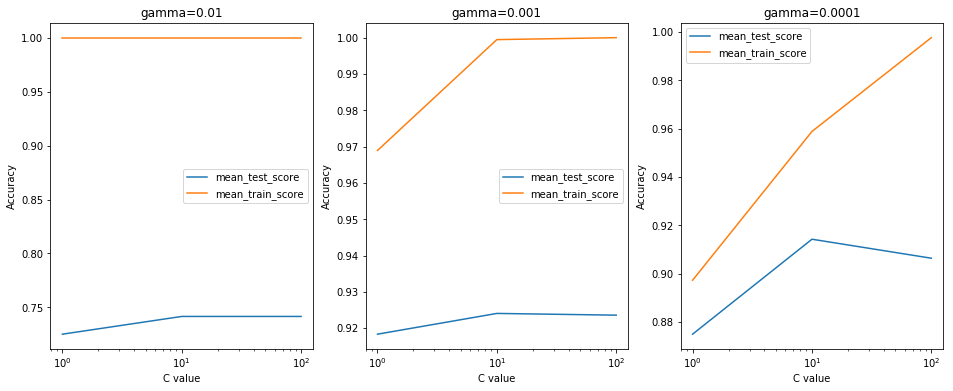

In [94]:
grid_result['param_C'] = grid_result['param_C'].astype(int)
plt.figure(figsize=(16,6))

plt.subplot(131)
gamma_1 = grid_result[grid_result['param_gamma']==0.01]
plt.plot(gamma_1['param_C'], gamma_1['mean_test_score'])
plt.plot(gamma_1['param_C'], gamma_1['mean_train_score'])
plt.xscale('log')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.legend(['mean_test_score', 'mean_train_score'], loc='best')
plt.title('gamma=0.01')

plt.subplot(132)
gamma_1 = grid_result[grid_result['param_gamma']==0.001]
plt.plot(gamma_1['param_C'], gamma_1['mean_test_score'])
plt.plot(gamma_1['param_C'], gamma_1['mean_train_score'])
plt.xscale('log')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.legend(['mean_test_score', 'mean_train_score'], loc='best')
plt.title('gamma=0.001')


plt.subplot(133)
gamma_1 = grid_result[grid_result['param_gamma']==0.0001]
plt.plot(gamma_1['param_C'], gamma_1['mean_test_score'])
plt.plot(gamma_1['param_C'], gamma_1['mean_train_score'])
plt.xscale('log')
plt.xlabel('C value')
plt.ylabel('Accuracy')
plt.legend(['mean_test_score', 'mean_train_score'], loc='best')
plt.title('gamma=0.0001')

In [96]:
grid_cv.best_params_

{'C': 10, 'gamma': 0.001}

# Final Model

Let's now build the final model with chosen hyperparameters.

In [97]:
svm_final = SVC(kernel='rbf', C=10, gamma=0.001)

In [98]:
svm_final.fit(X_train, y_train)

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [103]:
prediction = svm_final.predict(X_test)

In [104]:
# evaluation: CM 
confusion = metrics.confusion_matrix(y_test, prediction)

# measure accuracy
test_accuracy = metrics.accuracy_score(y_test, prediction)

print(test_accuracy, "\n")
print(confusion)


0.9318783068783069 

[[3615    0   10   12    4   12   38   11   11    2]
 [   0 4107   13   18    6    2    5   21    8    5]
 [  30   20 3438   60   37    4   37  112   41   11]
 [   8    9   92 3547    5   88    6   71   44   30]
 [   4   10   32    5 3460   11   33   46    3   98]
 [  22   21   12  114   20 3059   62   50   31   27]
 [  27    7   11    1    9   27 3548   47   16    0]
 [   5   22   21   11   49    4    2 3749   10   81]
 [  10   37   47   79   21   82   25   49 3290   25]
 [  15    7   18   28   97   12    0  174   15 3412]]


# Conclusion

The final accuracy on test data is approx. 93%. Note that this can be significantly increased by using the entire training data of 42,000 images (we have used just 10% of that!). 

